In [36]:
from datetime import date
from pandas_datareader import data as pdr
import statsmodels.formula.api as smf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime
import pandas as pd
import numpy as np

In [5]:
today= str(date.today())
month=12*4
N= 252 #os dados de Brent são diarios
anos= 5 #anos de propagação da previsao
dates=pd.date_range(date.today(),periods=N*anos)

In [59]:
start_date= str((date.today()- datetime.timedelta(month*365/12)).isoformat())



In [7]:
#Importar a série do brent. Buscar no site da US Energy Information Administration. Apagar a primeira planilha informativa
#manter só os dados
data_5= pd.read_excel('brent_spot.xls')


In [9]:
#Shifting a coluna do Brent
data_5['Brent_Shift']=data_5['Brent']
data_5.Brent_Shift=data_5.Brent_Shift.shift(1)


In [10]:
data_5.head()

,Date,Brent,Brent_Shift
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,18.63
2,1987-05-22,18.55,18.45
3,1987-05-25,18.60,18.55
4,1987-05-26,18.63,18.60


In [11]:

data_5['300MA']=data_5.Brent.rolling(300).mean()

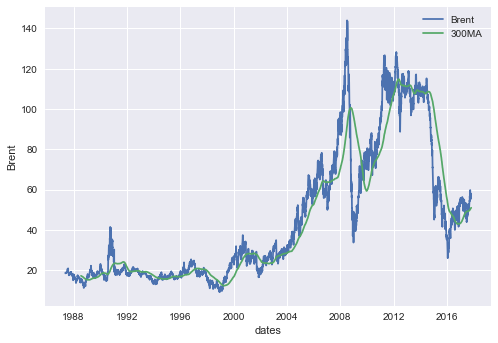

In [31]:
plt.plot(data_5.Date,data_5[['Brent','300MA']])
#data_5[['Brent','300MA']].plot()
plt.xlabel('dates')
plt.ylabel('Brent')
plt.legend(('Brent','300MA'))

In [13]:
#Obter parâmetros estatísticos
data_5['lnPtP0']= np.log(data_5['Brent'])- np.log(data_5['Brent_Shift'])
data_5['lnBrent']= np.log(data_5['Brent'])
data_5['lnBrent_Shift']= np.log(data_5['Brent_Shift'])


In [14]:
data_5.lnPtP0.describe()

count    7724.000000
mean        0.000146
std         0.022844
min        -0.361214
25%        -0.011144
50%         0.000081
75%         0.011894
max         0.181297
Name: lnPtP0, dtype: float64

In [15]:
#Parâmetros do MGB por ano

sigma_a= np.sqrt(N)*(data_5.lnPtP0.std())
alpha_a=N*((data_5.lnPtP0.mean()) +(0.5*np.power(sigma_a,2)/N))

In [16]:
sigma_a*100

36.264391449286038

In [17]:
#Parâmetros do MGB por dia

sigma_d= (np.sqrt(N)*(data_5.lnPtP0.std()))/np.sqrt(N)


In [18]:
MGB=smf.ols('lnPtP0 ~ np.log(Brent_Shift)', data=data_5).fit()
print (MGB.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnPtP0   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.123
Date:                Sun, 05 Nov 2017   Prob (F-statistic):              0.145
Time:                        17:36:38   Log-Likelihood:                 18231.
No. Observations:                7724   AIC:                        -3.646e+04
Df Residuals:                    7722   BIC:                        -3.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0020    

In [19]:
MGB=smf.ols('np.log(Brent) ~ np.log(Brent_Shift)', data=data_5).fit()
print (MGB.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Brent)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.480e+06
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:36:41   Log-Likelihood:                 18231.
No. Observations:                7724   AIC:                        -3.646e+04
Df Residuals:                    7722   BIC:                        -3.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0020    

In [20]:
#reta de regressao
data_5['RBrent_Shift_1']= np.log(data_5['Brent_Shift'])* 0.9995 + 0.0020
data_5['Brent_Shift_1_residuo']= np.log(data_5['Brent']) - data_5['RBrent_Shift_1']

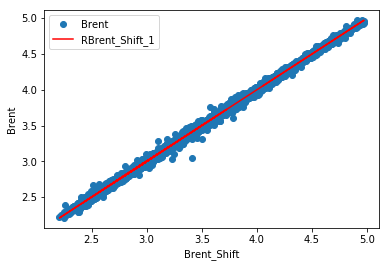

In [21]:
#Plot da regressao brent_shift e brent
plt.plot( np.log(data_5['Brent_Shift']), np.log(data_5['Brent']),'o')
plt.plot( np.log(data_5['Brent_Shift']), data_5['RBrent_Shift_1'] ,'-r')
plt.xlabel('Brent_Shift')
plt.ylabel('Brent')

plt.legend()


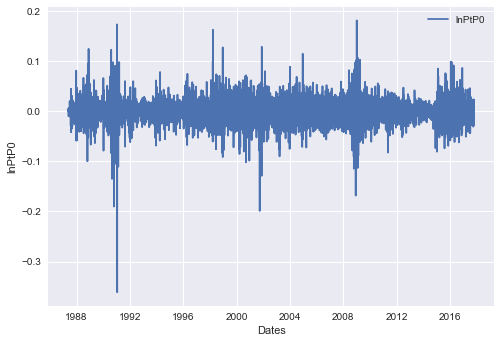

In [32]:
#Plot do lnptpto

plt.plot( data_5['Date'],data_5['lnPtP0'],'-')
plt.xlabel('Dates')
plt.ylabel('lnPtP0')

plt.legend()


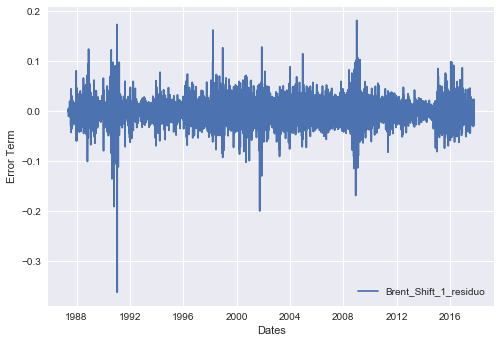

In [33]:
#Plot do residuo

plt.plot( data_5['Date'],data_5['Brent_Shift_1_residuo'],'-')
plt.xlabel('Dates')
plt.ylabel('Error Term')

plt.legend()


In [37]:
data_5.lnPtP0.describe()

count    7724.000000
mean        0.000146
std         0.022844
min        -0.361214
25%        -0.011144
50%         0.000081
75%         0.011894
max         0.181297
Name: lnPtP0, dtype: float64

In [38]:
data_5.Brent_Shift_1_residuo.describe()

count    7724.000000
mean       -0.000080
std         0.022841
min        -0.361509
25%        -0.011393
50%         0.000249
75%         0.011686
max         0.181087
Name: Brent_Shift_1_residuo, dtype: float64

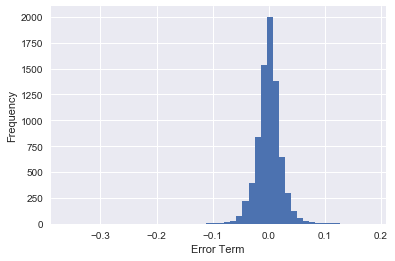

In [39]:
#Plot do Residuo Histograma
plt.hist(data_5.iloc[1:7724,8],50)
plt.xlabel('Error Term')
plt.ylabel('Frequency')


In [40]:
#reta de regressao raiz unitaria

data_5['RBrent_Shift']= np.log(data_5['Brent_Shift'])*-0.0005 +0.0020


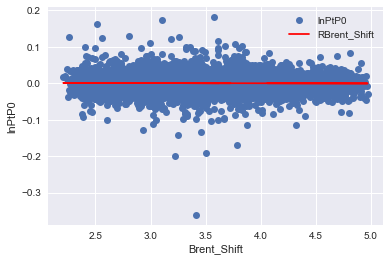

In [41]:

plt.plot( np.log(data_5['Brent_Shift']), data_5['lnPtP0'],'o')
plt.plot( np.log(data_5['Brent_Shift']), data_5['RBrent_Shift'] ,'-r')
plt.xlabel('Brent_Shift')
plt.ylabel('lnPtP0')

plt.legend()

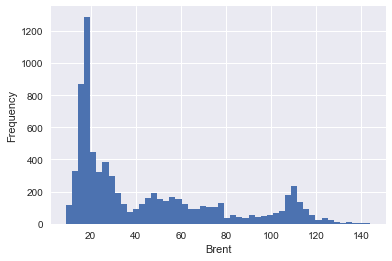

In [42]:
#Plot do Brent nao é possivel pois tem Nan
plt.hist(data_5['Brent'],50)
plt.xlabel('Brent')
plt.ylabel('Frequency')


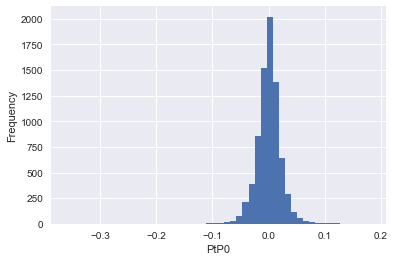

In [43]:
#Plot do PtP0 nao é possivel pois tem Nan
plt.hist(data_5.iloc[1:7724,4],50)
plt.xlabel('PtP0')
#plt.ylabel('Frequency')

In [44]:
#Simulações de MGB

#quantas simulaçoes deseja fazer
k=10

In [50]:
MGB_s= pd.DataFrame(np.random.randn(N*anos,k)*sigma_a, index=dates)
MGB1=MGB_s.cumsum()


In [51]:
MGB2=pd.DataFrame(np.zeros((N*anos,k)),index=dates)
MGB=pd.DataFrame(np.zeros((N*anos,k)),index=dates)
for j in range(k):
    drift=0
    for i in range(N*anos):
        MGB2.iloc[i,j]= data_5.iloc[-1,1]*np.exp(alpha_a*drift)
        drift=drift+(1/N)
    
for j in range (k):
    MGB.iloc[:,j]= MGB1.iloc[:,j]+ MGB2.iloc[:,j]

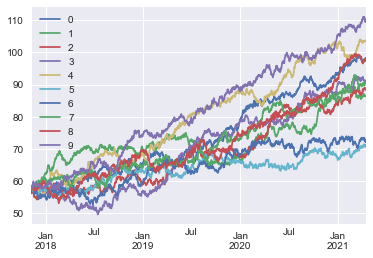

In [52]:

MGB.plot()


In [53]:
#renomear as simulações
MGB=MGB.rename(columns={0:'MGB0',1:'MGB1',2:'MGB2',3:'MGB3',4:'MGB4',5:'MGB5',6:'MGB6',7:'MGB0',8:'MGB8',9:'MGB9',})

In [55]:
resumo= pd.DataFrame({
                     'vol(%aa)': [sigma_a*100],
                     'alpha(%aa)': [alpha_a*100], 
                    'vol(%ad)': [sigma_d*100], 
                     'T(anos)': [anos],
                    'Esperança':[data_5.iloc[-1,1]*np.exp(alpha_a*anos)]})

In [56]:
resumo.head()

,Esperança,T(anos),alpha(%aa),vol(%aa),vol(%ad)
0,96.37488,5,10.263235,36.264391,2.284442


In [57]:
#concatenar série com a simulaçao

frames = [data_5.iloc[5000:7724,1:2], MGB]
result = pd.concat(frames, axis=1)



In [169]:
result.head()

,Brent,MGB0,MGB1,MGB2,MGB3,MGB4,MGB5,MGB6,MGB0,MGB8,MGB9
5000,52.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,52.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,52.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,51.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,49.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


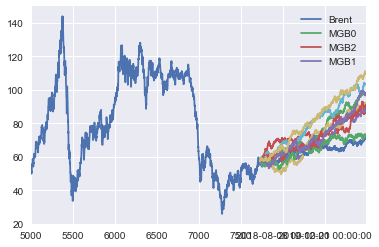

In [58]:
#Plot da série com a simulação
result.plot()

plt.legend(('Brent','MGB0','MGB2','MGB1'))